<a href="https://colab.research.google.com/github/4ndresveg4/Fraudes/blob/main/retoMELI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import pandas as pd
import sweetviz as sv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/MLFraud Dataset.xlsx')

print(df.head())


   A   B        C  D  E    F    G  H  I   J  ...  L  M  N  O  P     Q     R  \
0  0  10  50257.0  0  0  0.0  0.0  0  0  UY  ...  0  3  1  0  5  0.00  0.00   
1  0  10  29014.0  0  0  0.0  0.0  0  0  UY  ...  0  1  1  0  3  0.00  0.00   
2  0   7     92.0  0  1  0.0  0.0  0  1  UY  ...  0  3  1  0  2  0.00  0.00   
3  9  16  50269.0  0  0  0.0  0.0  0  0  UY  ...  0  3  1  0  5  0.00  0.00   
4  0   8   8180.0  0  0  0.0  0.0  0  0  UY  ...  0  1  1  0  1  0.00  0.00   

       S   Monto Fraude  
0   7.25   37.51      1  
1  11.66    8.18      1  
2  86.97   13.96      1  
3   2.51   93.67      1  
4  25.96  135.40      1  

[5 rows x 21 columns]


In [5]:
def resumen_columnas(df):
    resumen = pd.DataFrame({
        'Tipo de Dato': df.dtypes,
        'Valores Nulos': df.isnull().sum(),
        'Valores Únicos': df.nunique(),
        'Primeros 5 Valores': df.apply(lambda x: x.dropna().unique()[:5])
    })
    return resumen

# Llamar a la función para obtener el resumen
resumen_df = resumen_columnas(df)
print(resumen_df)


       Tipo de Dato  Valores Nulos  Valores Únicos  \
A             int64              0              21   
B             int64              0              21   
C           float64           3197            9782   
D             int64              0              31   
E             int64              0              23   
F           float64              0             152   
G           float64              0             105   
H             int64              0              14   
I             int64              0              17   
J            object              0              19   
K           float64          12864              86   
L             int64              0               8   
M             int64              0              11   
N             int64              0              10   
O             int64              0               4   
P             int64              0              14   
Q            object              0             605   
R            object         

Alguno de los datos en las variables Q, R y S estan definidos como fecha y no como numerico siendo de este tipo. Definimos esta columna como numericas.

In [6]:
df['Q'] = pd.to_numeric(df['Q'], errors='coerce')
df['R'] = pd.to_numeric(df['R'], errors='coerce')
df['S'] = pd.to_numeric(df['S'], errors='coerce')
df['Monto'] = pd.to_numeric(df['Monto'], errors='coerce')

In [7]:
resumen_columnas(df)

,Tipo de Dato,Valores Nulos,Valores Únicos,Primeros 5 Valores
A,int64,0,21,"[0, 9, 1, 10, 11]"
B,int64,0,21,"[10, 7, 16, 8, 12]"
C,float64,3197,9782,"[50257.0, 29014.0, 92.0, 50269.0, 8180.0]"
D,int64,0,31,"[0, 1, 12, 4, 3]"
E,int64,0,23,"[0, 1, 2, 4, 3]"
F,float64,0,152,"[0.0, 14.0, 7.0, 0.25, 0.19]"
G,float64,0,105,"[0.0, 58.0, 5.0, 33.0, 104.0]"
H,int64,0,14,"[0, 9, 1, 4, 3]"
I,int64,0,17,"[0, 1, 3, 2, 4]"
J,object,0,19,"[UY, MX, US, ES, AR]"


In [8]:
# Contar la frecuencia de cada valor en la columna J
frecuencia_paises = df['J'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
frecuencia_paises.columns = ['País', 'Frecuencia']

# Mostrar la tabla resumen
frecuencia_paises


,País,Frecuencia
0,AR,9329
1,BR,4428
2,MX,2366
3,ES,314
4,US,230
5,UY,180
6,CA,12
7,GB,8
8,GT,2
9,FR,2


# Análisis Exploratorio

Genero primero un resumen usando la librería Sweetviz

In [10]:
# Generar el reporte
report = sv.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

In [11]:
# Descargar el archivo HTML en una nueva pestaña del navegador
files.download('/content/SWEETVIZ_REPORT.html')


FileNotFoundError: Cannot find file: /content/SWEETVIZ_REPORT.html

# Análisis para la Detección de Fraude

## Distribución de los Datos y Observaciones Iniciales

### Variables con Asociaciones Fuertes
La matriz destaca algunas variables que tienen asociaciones notables con la variable 'Fraude' (que representa si una transacción es fraudulenta o no). Por ejemplo:

- **K**: Muestra una asociación más fuerte con 'Fraude', lo que indica que podría tener una influencia significativa en la predicción de actividades fraudulentas.
- **Monto**: Aunque no está tan fuertemente asociada como K, 'Monto' (el monto de la transacción) es a menudo una variable crítica en la detección de fraudes, ya que las anomalías en los montos de transacciones pueden ser indicadoras de fraude.

### Tipos de Datos y Desbalances
- El conjunto de datos está compuesto principalmente por datos numéricos, excepto la columna 'J', que contiene datos categóricos (por ejemplo, códigos de países). Esta variable podría introducir sesgos categóricos o requerir codificación one-hot para ser utilizada en modelos.
- El conjunto de datos tiene desbalances en las clases, donde la clase 'Fraude' podría estar subrepresentada. Esto es común en los conjuntos de datos de detección de fraude y podría influir en el rendimiento del modelo.

## Variables que Podrían Influir en la Predicción del Fraude
- **K**: Dado su fuerte asociación, esta variable debe ser analizada de cerca. Podría representar una característica clave relacionada con las transacciones que podría ser predictiva de fraude.
- **Monto**: Analizar la distribución y las anomalías en los montos de las transacciones puede proporcionar información valiosa. Los montos de transacción más altos o inusuales a menudo se correlacionan con actividades fraudulentas.
- **Otras Variables Influyentes**: Variables como L, G y F también muestran algunas asociaciones y deben considerarse para el análisis de importancia de características.



### Selección de Características
**K**, **Monto** y otras que tengan altas asociaciones con 'Fraude'. Estas variables debería priorizarse en la selección de características para el modelo.






In [ ]:
# Conteo de valores nulos
print(df.isnull().sum())

# Porcentaje de valores nulos
print((df.isnull().sum() / df.shape[0]) * 100)


In [ ]:
import matplotlib.pyplot as plt

# Histogramas para todas las variables numéricas
df.hist(bins=30, figsize=(15, 10))
plt.show()


In [ ]:
import seaborn as sns

# Gráfico de barras para la variable categórica 'J'
plt.figure(figsize=(10, 6))
sns.countplot(y='J', data=df, order=df['J'].value_counts().index)
plt.title('Frecuencia de las Categorías en J')
plt.show()


In [ ]:
# Excluir la columna 'J' antes de calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()



Nota: Hay una diferencia entre la correlación de Pearson y la ratio Calculada en SWEETVIZ dado que esta ultima usa la correlación Ratio (CR)

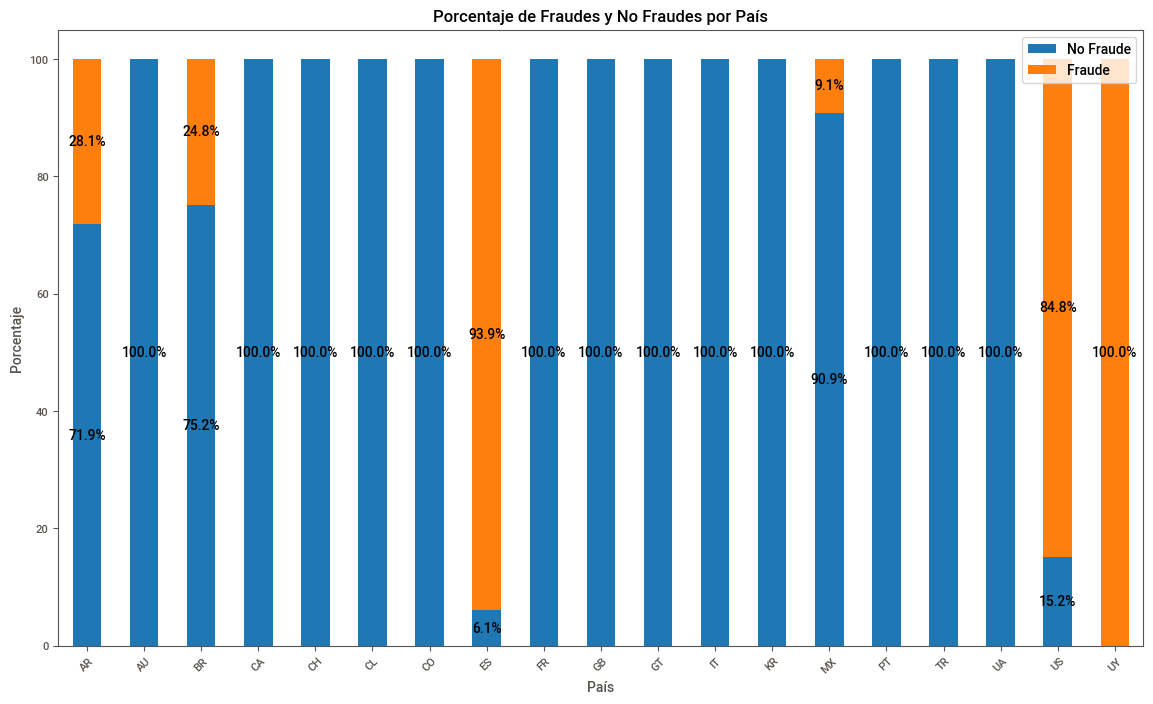

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de fraudes y no fraudes por país
fraude_por_pais = df.groupby(['J', 'Fraude']).size().unstack().fillna(0)
fraude_por_pais = fraude_por_pais.apply(lambda x: x / x.sum() * 100, axis=1)

# Crear un gráfico de barras apiladas
ax = fraude_por_pais.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Personalización del gráfico
plt.title('Porcentaje de Fraudes y No Fraudes por País')
plt.xlabel('País')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(['No Fraude', 'Fraude'], loc='upper right')
plt.show()



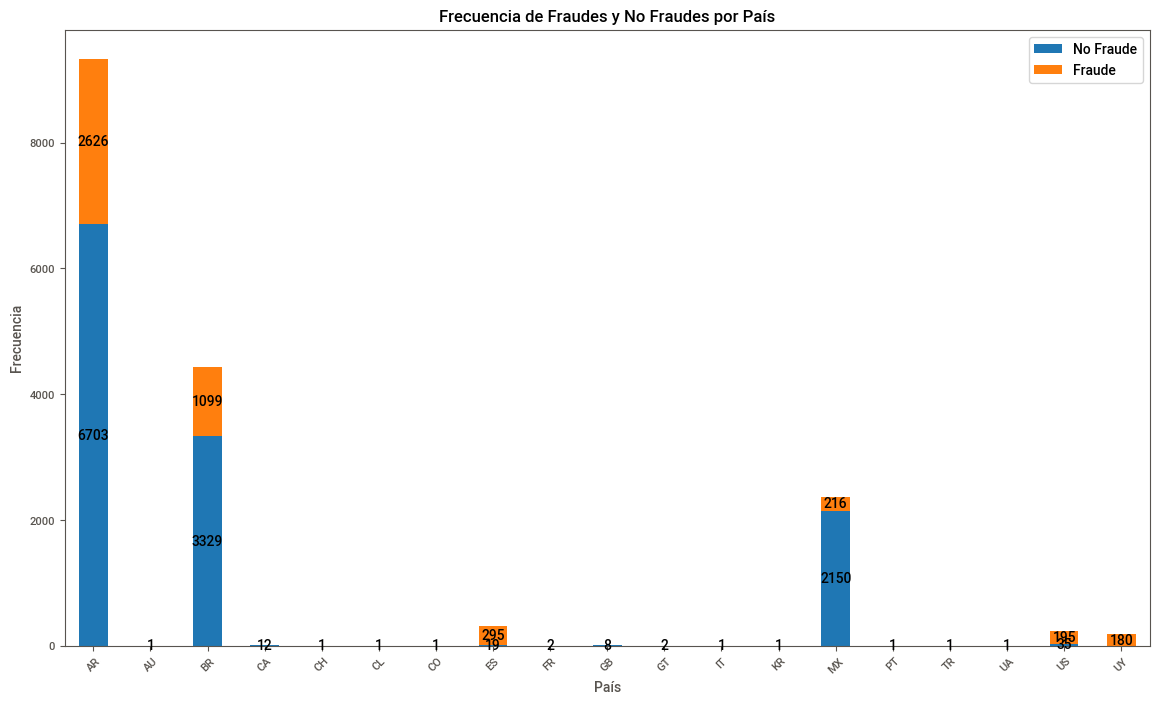

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de fraudes y no fraudes por país
fraude_por_pais = df.groupby(['J', 'Fraude']).size().unstack().fillna(0)

# Crear un gráfico de barras apiladas
ax = fraude_por_pais.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])

# Añadir las frecuencias sobre las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Personalización del gráfico
plt.title('Frecuencia de Fraudes y No Fraudes por País')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(['No Fraude', 'Fraude'], loc='upper right')
plt.show()


In [14]:
fraude_por_pais

Fraude,0,1
J,,
AR,6703.0,2626.0
AU,1.0,0.0
BR,3329.0,1099.0
CA,12.0,0.0
CH,1.0,0.0
CL,1.0,0.0
CO,1.0,0.0
ES,19.0,295.0
FR,2.0,0.0


<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


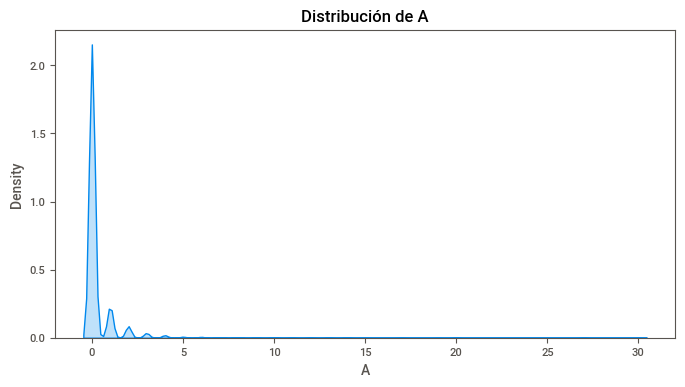

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


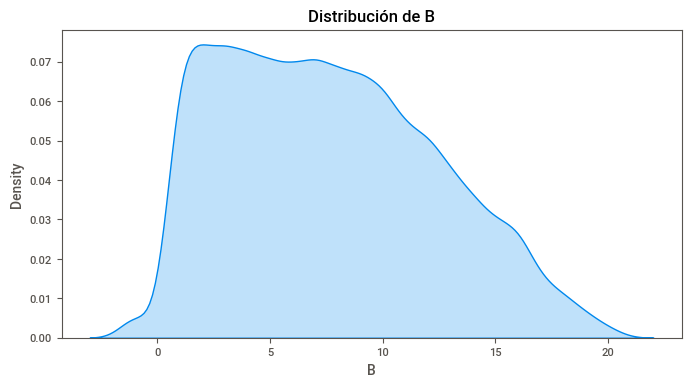

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


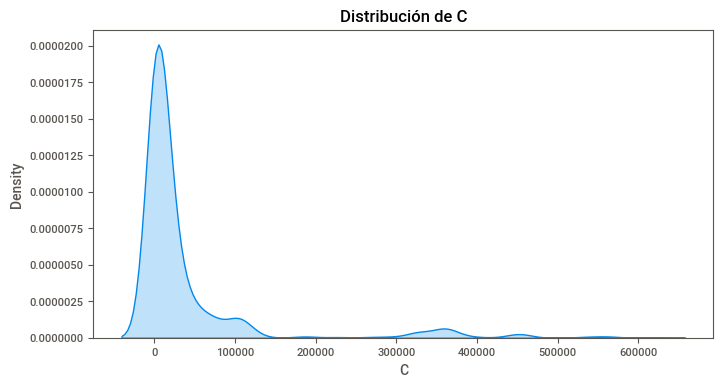

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


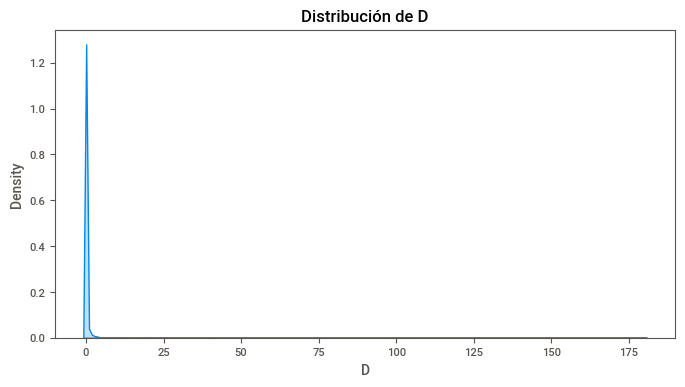

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


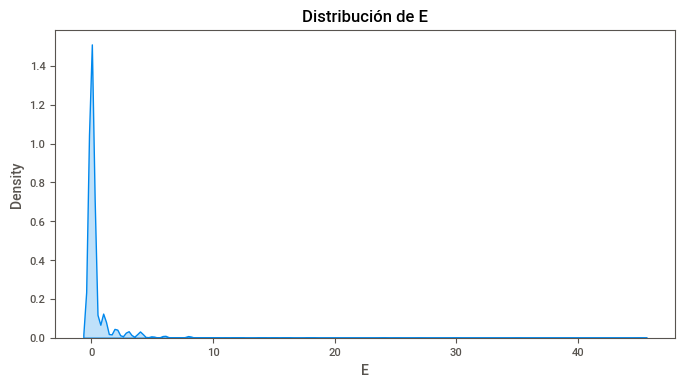

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


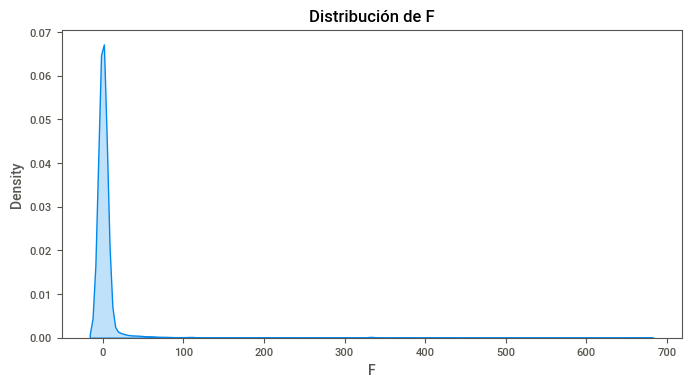

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


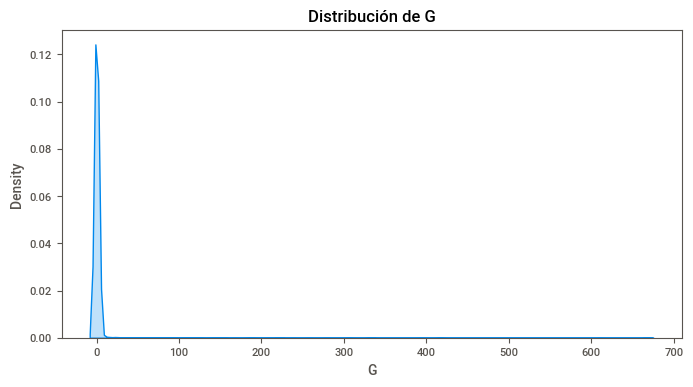

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


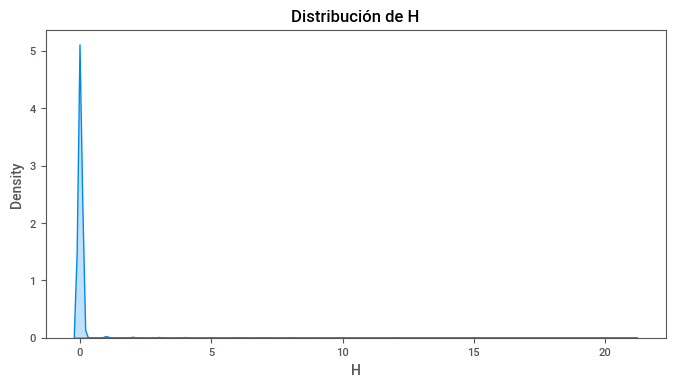

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


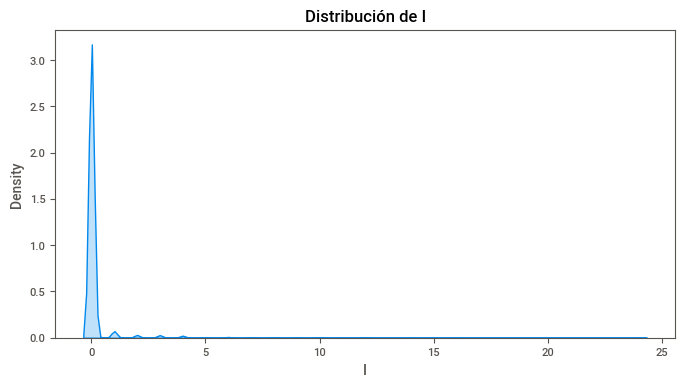

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


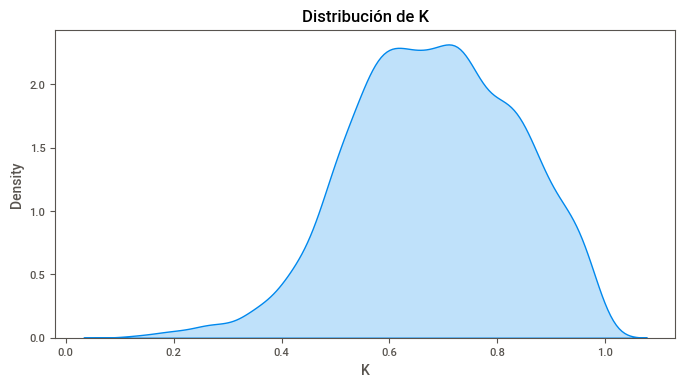

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


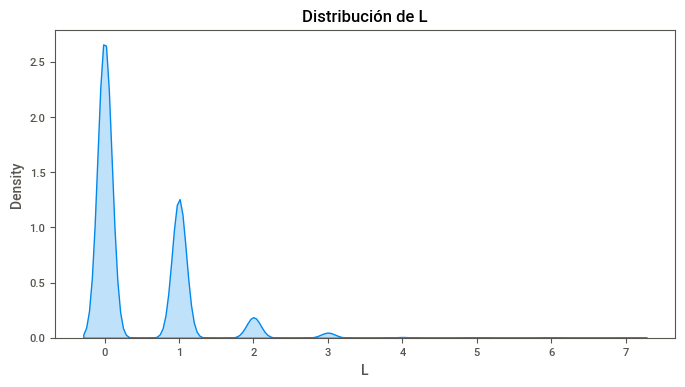

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


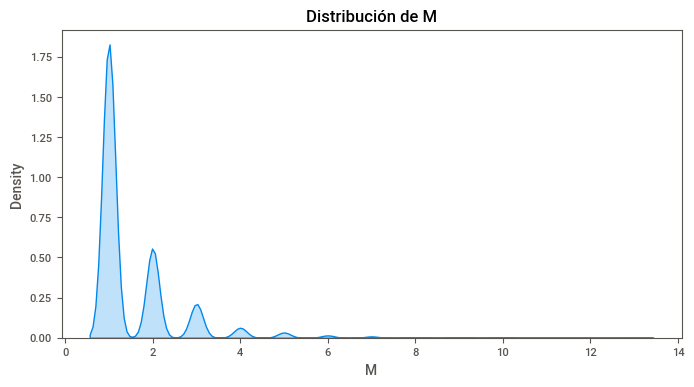

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


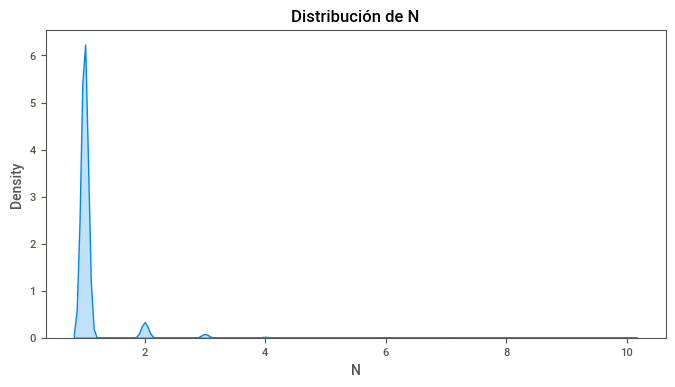

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


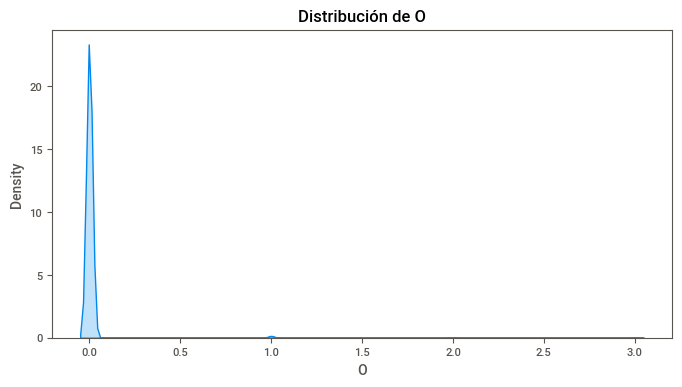

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


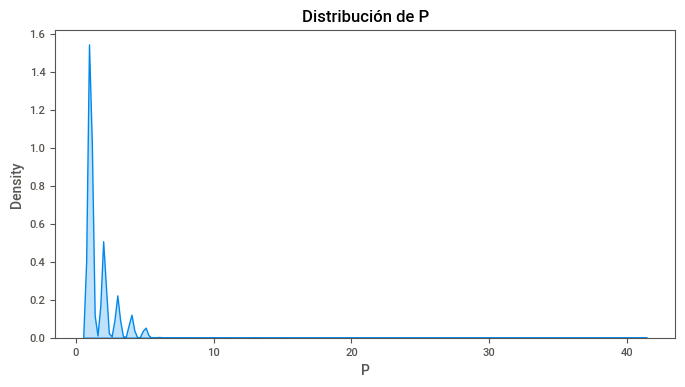

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


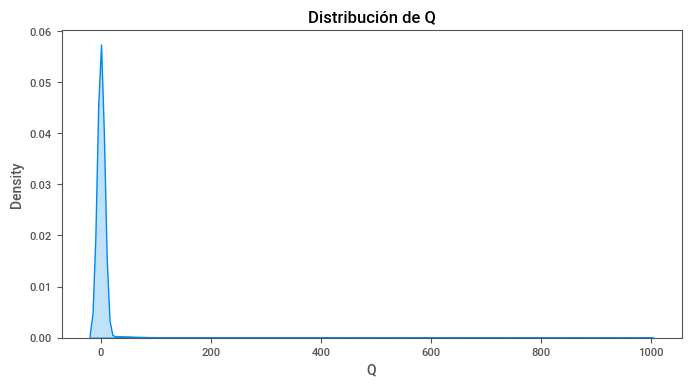

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


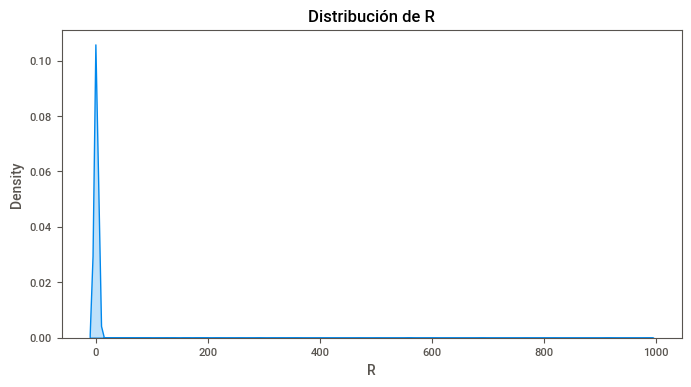

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


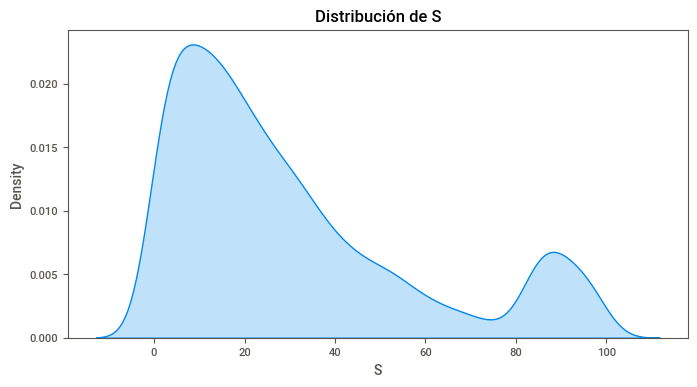

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


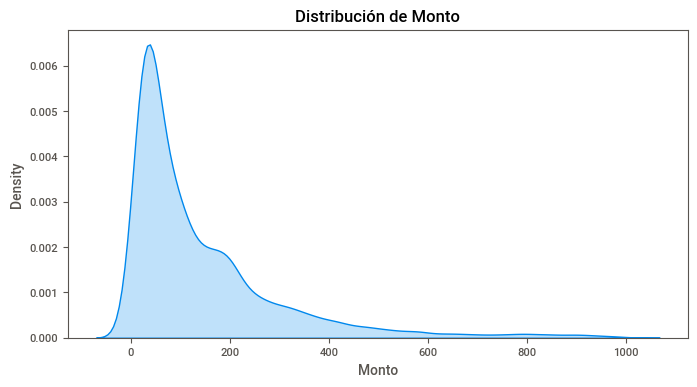

<ipython-input-15-3c9b67d80306>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


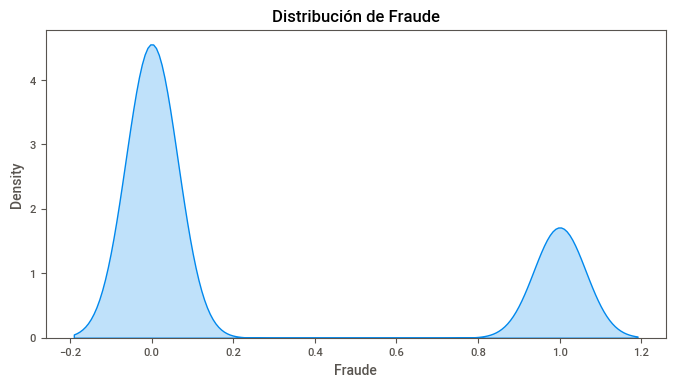

In [15]:
# Gráfico de densidad para variables numéricas
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Distribución de {column}')
    plt.show()


### Variable A:
- La distribución de A está muy sesgada hacia la izquierda, con una alta concentración de valores cercanos a 0.

### Variable B:
- La distribución de B es más uniforme, con una concentración moderada en valores más bajos (entre 5 y 10) y disminuye gradualmente hacia los valores más altos.

### Variable C:
- La distribución de C es extremadamente sesgada hacia la izquierda, con la mayoría de los valores cerca de 0 y muy pocos valores dispersos en rangos altos.

### Variable D:
- D sigue un patrón similar a C, con una distribución muy sesgada hacia la izquierda y algunos valores altos aislados.

### Variable E:
- La distribución de E también está sesgada hacia la izquierda, con la mayoría de los valores concentrados cerca de 0.

### Variable F:
- F presenta una distribución con un fuerte sesgo hacia valores bajos, similar a las variables anteriores.

### Variable G:
- G tiene una distribución similar a F, con la mayoría de los valores muy cercanos a 0.

### Variable H:
- H muestra una densidad alta cerca de 0, con algunos valores dispersos hasta aproximadamente 20.

### Variable I:
- La distribución de I es similar a H, con una densidad alta cerca de 0 y pocos valores en los rangos más altos.

### Variable K:
- La variable K tiene una distribución más uniforme, con una densidad considerable en el rango de 0.4 a 0.8.

### Variable M:
- M presenta un patrón similar a F y G, con la mayoría de los valores concentrados en el rango bajo.

### Variable N:
- N también sigue el patrón de sesgo hacia la izquierda, con valores concentrados cerca de 0.

### Variable O:
- O presenta una distribución muy sesgada hacia 0, con muy pocos valores altos.

### Variable P:
- P sigue el patrón común de sesgo hacia la izquierda, con una alta densidad de valores bajos.

### Variable R:
- R tiene una distribución muy concentrada en valores bajos, con una densidad alta cerca de 0.

### Variable S:
- S presenta una distribución bimodal, con dos picos, uno alrededor de 10-20 y otro alrededor de 60-80.

### Variable Monto:
- La distribución de la variable 'Monto' muestra que la mayoría de los montos están en rangos bajos, con algunos valores más dispersos en rangos altos.

### Variable Fraude:
- La distribución de la variable 'Fraude' es bimodal, indicando dos categorías claras (0 y 1), con la mayoría de los datos en 0 (No Fraude) y un menor porcentaje en 1 (Fraude).

### Conclusión general:
- La mayoría de las variables presentan distribuciones muy sesgadas hacia la izquierda, con altas concentraciones de valores bajos.
- Algunas variables, como K y S, muestran patrones más variados y podrían tener más capacidad para discriminar entre casos de fraude y no fraude (pero K tinen al rededor de 72% como datos faltantes).



# Preprocesamiento de Datos
1. Voy a eliminar K dado qeu el valor de datos faltantes es muy alto y corro el riesgo muy grande sesgo o ruido en el modelo.

In [16]:
# Mostrar el número de valores NaN en cada columna
nan_counts = df.isna().sum()

# Mostrar el resultado
print(nan_counts)


A             0
B             0
C          3197
D             0
E             0
F             0
G             0
H             0
I             0
J             0
K         12864
L             0
M             0
N             0
O             0
P             0
Q            41
R             9
S          1305
Monto       705
Fraude        0
dtype: int64


In [17]:
## Ver la distribución de NaNs en las otras columnas en relación con la columna 'Fraude'
nan_distribution = df.groupby('Fraude').apply(lambda x: x.isna().sum())

# Mostrar el resultado
print(nan_distribution)



        A  B     C  D  E  F  G  H  I  J  ...  L  M  N  O  P   Q  R     S  \
Fraude                                   ...                               
0       0  0  2644  0  0  0  0  0  0  0  ...  0  0  0  0  0  15  1  1029   
1       0  0   553  0  0  0  0  0  0  0  ...  0  0  0  0  0  26  8   276   

        Monto  Fraude  
Fraude                 
0         545       0  
1         160       0  

[2 rows x 21 columns]


### Uso Imputación por random forest dado que algunas variables tienen gran cantidad de datos faltantes y eliinación de la columna K dado que la cantidd de datos faltantes son el 72% y puede hacer ruido al modelo.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Función para la imputación usando Random Forest
def random_forest_imputation(df, column_to_impute):
    # Separar las filas con y sin valores faltantes en la columna a imputar
    df_notnull = df[df[column_to_impute].notnull()]
    df_null = df[df[column_to_impute].isnull()]

    # Excluir la columna a imputar de las características
    features = df_notnull.drop(columns=[column_to_impute])

    # Solo mantener las columnas numéricas y sin NaN para el entrenamiento
    features = features.select_dtypes(include=[np.number])
    features_notnull = features.dropna(axis=1)

    # Revisar si las columnas de entrenamiento tienen NaN
    if features_notnull.isna().sum().sum() > 0:
        print(f"Hay columnas con NaN que no deberían estar presentes en las características: {features_notnull.columns[features_notnull.isna().any()].tolist()}")
        return df, None

    # Entrenamiento del modelo
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(features_notnull, df_notnull[column_to_impute])

    # Predicción de los valores faltantes
    features_null = df_null[features_notnull.columns]
    predicted_values = model.predict(features_null)

    # Imputación en el DataFrame original
    df.loc[df[column_to_impute].isnull(), column_to_impute] = predicted_values

    # Evaluación del error de imputación
    y_pred = model.predict(features_notnull)
    error = np.sqrt(mean_squared_error(df_notnull[column_to_impute], y_pred))

    return df, error

# Columnas que vamos a imputar
columnas_a_imputar = ['C', 'Q', 'R', 'S','Monto']  # Excluyendo 'K'

# Diccionario para almacenar los errores de imputación
imputacion_errores = {}

# Imputación en cada columna con valores faltantes
for col in columnas_a_imputar:
    print(f"Imputando valores faltantes para la columna: {col}")
    df, error = random_forest_imputation(df, col)
    imputacion_errores[col] = error
    print(f"Error de imputación para {col}: {error}\n")

# Mostrar los errores de imputación
print("Errores de imputación por columna:")
print(imputacion_errores)



Imputando valores faltantes para la columna: C
Error de imputación para C: 76321.87375112243

Imputando valores faltantes para la columna: Q
Error de imputación para Q: 15.887481237707481

Imputando valores faltantes para la columna: R
Error de imputación para R: 9.985179326029199

Imputando valores faltantes para la columna: S
Error de imputación para S: 10.313646126094852

Imputando valores faltantes para la columna: Monto
Error de imputación para Monto: 57.157822229226156

Errores de imputación por columna:
{'C': 76321.87375112243, 'Q': 15.887481237707481, 'R': 9.985179326029199, 'S': 10.313646126094852, 'Monto': 57.157822229226156}


In [19]:
# Aplicar One-Hot Encoding a la variable 'J' y eliminar la columna 'K'
X = pd.get_dummies(df.drop(columns=['K']), columns=['J'])

# Renombrar las columnas eliminando la "J_" al principio de cada nombre de columna
X.columns = X.columns.str.replace('^J_', '', regex=True)

# Convertir los valores booleanos True/False a 1/0
X = X.astype(int)

# Mostrar las primeras filas para verificar
X.head()



,A,B,C,D,E,F,G,H,I,L,...,GB,GT,IT,KR,MX,PT,TR,UA,US,UY
0,0,10,50257,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,10,29014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,7,92,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9,16,50269,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,8,8180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
print(X.Fraude)

0        1
1        1
2        1
3        1
4        1
        ..
16875    1
16876    1
16877    1
16878    1
16879    1
Name: Fraude, Length: 16880, dtype: int64


Escalado por MinMax para los datos

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd

# Extraer la columna 'Fraude' como la variable objetivo y eliminarla de X
y = X['Fraude']
X = X.drop(columns=['Fraude'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador en los datos de entrenamiento y luego transformar tanto los datos de entrenamiento como los de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
# Calcular la ganancia esperada
def calcular_ganancia(y_true, y_pred, X_test):
    ganancia = 0
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 0:  # Falso positivo
            ganancia -= X_test.iloc[i]['Monto']  # Se pierde el 100% del dinero
        elif y_pred[i] == 0 and y_true[i] == 0:  # Verdadero negativo
            ganancia += 0.25 * X_test.iloc[i]['Monto']  # Se gana el 25% del dinero
    return ganancia

# LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Crear el modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lda = lda_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (LDA):")
print(confusion_matrix(y_test, y_pred_lda))
print("\nReporte de clasificación (LDA):")
print(classification_report(y_test, y_pred_lda))
print("\nPrecisión del modelo (LDA):")
print(accuracy_score(y_test, y_pred_lda))

# Calcular y mostrar la ganancia
ganancia_lda = calcular_ganancia(y_test.values, y_pred_lda, X_test)
print(f"\nGanancia esperada (LDA): {ganancia_lda:.2f} unidades monetarias")



Matriz de confusión (LDA):
[[3493  201]
 [ 894  476]]

Reporte de clasificación (LDA):
              precision    recall  f1-score   support

           0       0.80      0.95      0.86      3694
           1       0.70      0.35      0.47      1370

    accuracy                           0.78      5064
   macro avg       0.75      0.65      0.66      5064
weighted avg       0.77      0.78      0.76      5064


Precisión del modelo (LDA):
0.7837677725118484

Ganancia esperada (LDA): 112078.75 unidades monetarias


# Regresion Logistica

In [24]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=100, max_iter=1000)

# Entrenar el modelo
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (Regresión Logística):")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))
print("\nPrecisión del modelo (Regresión Logística):")
print(accuracy_score(y_test, y_pred_lr))

# Calcular y mostrar la ganancia
ganancia_lr = calcular_ganancia(y_test.values, y_pred_lr, X_test)
print(f"\nGanancia esperada (Regresión Logística): {ganancia_lr:.2f} unidades monetarias")


Matriz de confusión (Regresión Logística):
[[3464  230]
 [ 887  483]]

Reporte de clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3694
           1       0.68      0.35      0.46      1370

    accuracy                           0.78      5064
   macro avg       0.74      0.65      0.66      5064
weighted avg       0.76      0.78      0.75      5064


Precisión del modelo (Regresión Logística):
0.7794233807266983

Ganancia esperada (Regresión Logística): 107971.25 unidades monetarias


# SVM lineal

In [25]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=100)

# Entrenar el modelo
svm_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nReporte de clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))
print("\nPrecisión del modelo (SVM):")
print(accuracy_score(y_test, y_pred_svm))

# Calcular y mostrar la ganancia
ganancia_svm = calcular_ganancia(y_test.values, y_pred_svm, X_test)
print(f"\nGanancia esperada (SVM): {ganancia_svm:.2f} unidades monetarias")


Matriz de confusión (SVM):
[[3680   14]
 [1156  214]]

Reporte de clasificación (SVM):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3694
           1       0.94      0.16      0.27      1370

    accuracy                           0.77      5064
   macro avg       0.85      0.58      0.57      5064
weighted avg       0.81      0.77      0.70      5064


Precisión del modelo (SVM):
0.768957345971564

Ganancia esperada (SVM): 138336.25 unidades monetarias


# Random Forest


In [26]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

# Mostrar las importancias de las variables en porcentaje
importances = rf_model.feature_importances_
importances_percent = 100.0 * (importances / importances.sum())
feature_importances = pd.DataFrame({'Variable': X.columns, 'Importancia (%)': importances_percent})
feature_importances = feature_importances.sort_values(by='Importancia (%)', ascending=False)
print("\nImportancias de las variables:")
print(feature_importances)



# Calcular y mostrar la ganancia
ganancia = calcular_ganancia(y_test.values, y_pred, X_test)
print(f"\nGanancia esperada: {ganancia:.2f} unidades monetarias")



Matriz de confusión:
[[3470  224]
 [ 765  605]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3694
           1       0.73      0.44      0.55      1370

    accuracy                           0.80      5064
   macro avg       0.77      0.69      0.71      5064
weighted avg       0.80      0.80      0.79      5064


Precisión del modelo:
0.8046998420221169

Importancias de las variables:
   Variable  Importancia (%)
2         C     1.772332e+01
16        S     1.697755e+01
17    Monto     1.560449e+01
1         B     1.488900e+01
13        P     4.530540e+00
10        M     3.339290e+00
25       ES     3.080044e+00
9         L     2.783060e+00
0         A     2.672442e+00
31       MX     2.289771e+00
4         E     2.246128e+00
36       UY     2.004948e+00
5         F     1.848322e+00
35       US     1.588212e+00
14        Q     1.482733e+00
18       AR     1.433161e+00
20       BR     1.115663e+00
3 

# Gradient Boosted Trees

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo de Gradient Boosted Trees
gbt_model = GradientBoostingClassifier(n_estimators=100, random_state=100)

# Entrenar el modelo
gbt_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_gbt = gbt_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (Gradient Boosted Trees):")
print(confusion_matrix(y_test, y_pred_gbt))
print("\nReporte de clasificación (Gradient Boosted Trees):")
print(classification_report(y_test, y_pred_gbt))
print("\nPrecisión del modelo (Gradient Boosted Trees):")
print(accuracy_score(y_test, y_pred_gbt))

# Mostrar las importancias de las variables en porcentaje
importances_gbt = gbt_model.feature_importances_
importances_percent_gbt = 100.0 * (importances_gbt / importances_gbt.sum())
feature_importances_gbt = pd.DataFrame({'Variable': X.columns, 'Importancia (%)': importances_percent_gbt})
feature_importances_gbt = feature_importances_gbt.sort_values(by='Importancia (%)', ascending=False)
print("\nImportancias de las variables (Gradient Boosted Trees):")
print(feature_importances_gbt)

# Calcular y mostrar la ganancia
ganancia_gbt = calcular_ganancia(y_test.values, y_pred_gbt, X_test)
print(f"\nGanancia esperada (Gradient Boosted Trees): {ganancia_gbt:.2f} unidades monetarias")


Matriz de confusión (Gradient Boosted Trees):
[[3514  180]
 [ 831  539]]

Reporte de clasificación (Gradient Boosted Trees):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3694
           1       0.75      0.39      0.52      1370

    accuracy                           0.80      5064
   macro avg       0.78      0.67      0.70      5064
weighted avg       0.79      0.80      0.78      5064


Precisión del modelo (Gradient Boosted Trees):
0.8003554502369669

Importancias de las variables (Gradient Boosted Trees):
   Variable  Importancia (%)
1         B        29.675396
16        S        12.883155
25       ES        11.232084
31       MX         8.697526
36       UY         8.007381
35       US         5.970320
2         C         5.957233
13        P         3.902723
17    Monto         3.350312
14        Q         2.404002
10        M         1.646909
9         L         1.495261
0         A         1.220811
5         F       

# Extreme Gradient Boosting

In [28]:
from xgboost import XGBClassifier

# Crear el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=100, use_label_encoder=False)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nReporte de clasificación (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("\nPrecisión del modelo (XGBoost):")
print(accuracy_score(y_test, y_pred_xgb))

# Calcular y mostrar la ganancia
ganancia_xgb = calcular_ganancia(y_test.values, y_pred_xgb, X_test)
print(f"\nGanancia esperada (XGBoost): {ganancia_xgb:.2f} unidades monetarias")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:29:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de confusión (XGBoost):
[[3399  295]
 [ 733  637]]

Reporte de clasificación (XGBoost):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3694
           1       0.68      0.46      0.55      1370

    accuracy                           0.80      5064
   macro avg       0.75      0.69      0.71      5064
weighted avg       0.78      0.80      0.78      5064


Precisión del modelo (XGBoost):
0.7969984202211691

Ganancia esperada (XGBoost): 103228.75 unidades monetarias


# Redes Neuronales

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Hacer predicciones en el conjunto de prueba
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluar el modelo
print("Matriz de confusión (Red Neuronal):")
print(confusion_matrix(y_test, y_pred_nn))
print("\nReporte de clasificación (Red Neuronal):")
print(classification_report(y_test, y_pred_nn))
print("\nPrecisión del modelo (Red Neuronal):")
print(accuracy_score(y_test, y_pred_nn))

# Calcular y mostrar la ganancia
ganancia_nn = calcular_ganancia(y_test.values, y_pred_nn, X_test)
print(f"\nGanancia esperada (Red Neuronal): {ganancia_nn:.2f} unidades monetarias")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7218 - loss: 0.5630 - val_accuracy: 0.7978 - val_loss: 0.4549
Epoch 2/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7743 - loss: 0.4785 - val_accuracy: 0.7978 - val_loss: 0.4468
Epoch 3/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7715 - loss: 0.4790 - val_accuracy: 0.7910 - val_loss: 0.4422
Epoch 4/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7783 - loss: 0.4702 - val_accuracy: 0.7961 - val_loss: 0.4447
Epoch 5/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7738 - loss: 0.4721 - val_accuracy: 0.7843 - val_loss: 0.4464
Epoch 6/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7774 - loss: 0.4641 - val_accuracy: 0.7800 - val_loss: 0.4458
Epoch 7/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7768 - loss: 0.4598 - val_accuracy: 0.7876 - val_loss: 0.4441
Epoch 8/50
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7769 - loss: 0.4604 - val_accuracy: 0.7893 - val_

Dado que el mejor model fue el SVM, probé otros kernel para ver si mejora las predicicones.

In [30]:
from sklearn.svm import SVC

# Crear el modelo SVM con kernel polinómico
svm_poly_model = SVC(kernel='poly', degree=3, random_state=100)

# Entrenar el modelo
svm_poly_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm_poly = svm_poly_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM con kernel polinómico):")
print(confusion_matrix(y_test, y_pred_svm_poly))
print("\nReporte de clasificación (SVM con kernel polinómico):")
print(classification_report(y_test, y_pred_svm_poly))
print("\nPrecisión del modelo (SVM con kernel polinómico):")
print(accuracy_score(y_test, y_pred_svm_poly))

# Calcular y mostrar la ganancia
ganancia_svm_poly = calcular_ganancia(y_test.values, y_pred_svm_poly, X_test)
print(f"\nGanancia esperada (SVM con kernel polinómico): {ganancia_svm_poly:.2f} unidades monetarias")


Matriz de confusión (SVM con kernel polinómico):
[[3618   76]
 [1026  344]]

Reporte de clasificación (SVM con kernel polinómico):
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3694
           1       0.82      0.25      0.38      1370

    accuracy                           0.78      5064
   macro avg       0.80      0.62      0.63      5064
weighted avg       0.79      0.78      0.74      5064


Precisión del modelo (SVM con kernel polinómico):
0.7823854660347551

Ganancia esperada (SVM con kernel polinómico): 131357.50 unidades monetarias


In [31]:
# Crear el modelo SVM con kernel RBF
svm_rbf_model = SVC(kernel='rbf', random_state=100)

# Entrenar el modelo
svm_rbf_model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm_rbf = svm_rbf_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM con kernel RBF):")
print(confusion_matrix(y_test, y_pred_svm_rbf))
print("\nReporte de clasificación (SVM con kernel RBF):")
print(classification_report(y_test, y_pred_svm_rbf))
print("\nPrecisión del modelo (SVM con kernel RBF):")
print(accuracy_score(y_test, y_pred_svm_rbf))

# Calcular y mostrar la ganancia
ganancia_svm_rbf = calcular_ganancia(y_test.values, y_pred_svm_rbf, X_test)
print(f"\nGanancia esperada (SVM con kernel RBF): {ganancia_svm_rbf:.2f} unidades monetarias")


Matriz de confusión (SVM con kernel RBF):
[[3612   82]
 [1027  343]]

Reporte de clasificación (SVM con kernel RBF):
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3694
           1       0.81      0.25      0.38      1370

    accuracy                           0.78      5064
   macro avg       0.79      0.61      0.62      5064
weighted avg       0.79      0.78      0.74      5064


Precisión del modelo (SVM con kernel RBF):
0.781003159557662

Ganancia esperada (SVM con kernel RBF): 131823.75 unidades monetarias


## Dado que el modelo de SVM resultó siendo la que mayor ganancia genera voy a concentrarme en este modelo

In [32]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Crear una nueva columna en X_test llamada 'Predicciones' y asignarle los valores de y_pred_svm
X_test['Predicciones'] = y_pred_svm

# Mostrar las primeras filas de X_test para verificar
X_test


,A,B,C,D,E,F,G,H,I,L,...,GT,IT,KR,MX,PT,TR,UA,US,UY,Predicciones
2118,0,5,196,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6726,0,1,46129,1,1,111,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16710,0,13,544,8,6,0,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0
10817,0,6,68603,0,6,222,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1983,0,5,474,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,0,14,24295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,6,20620,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3839,0,5,3832,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4699,0,8,4285,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.5,0.0,0,0,BR,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.0,0.0,0,0,BR,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.0,0.0,0,0,BR,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.0,0.0,0,0,BR,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


In [35]:
# Asegúrate de que los índices de X_test coincidan con los índices de df
# Seleccionar la columna 'J' de df usando los índices de X_test
X_test['J'] = df.loc[X_test.index, 'J']

# Verifica las primeras filas para asegurarte de que se ha añadido correctamente la columna 'J'
print(X_test.head())


       A   B      C  D  E    F  G  H  I  L  ...  IT  KR  MX  PT  TR  UA  US  \
2118   0   5    196  0  0    0  0  0  0  0  ...   0   0   0   0   0   0   0   
6726   0   1  46129  1  1  111  1  0  0  0  ...   0   0   0   0   0   0   0   
16710  0  13    544  8  6    0  3  4  4  2  ...   0   0   0   0   0   0   0   
10817  0   6  68603  0  6  222  0  0  0  0  ...   0   0   1   0   0   0   0   
1983   0   5    474  0  0    0  0  0  0  2  ...   0   0   0   0   0   0   0   

       UY  Predicciones   J  
2118    0             0  AR  
6726    0             0  AR  
16710   0             0  BR  
10817   0             0  MX  
1983    0             0  AR  

[5 rows x 39 columns]


In [36]:
# Crear una nueva columna en X_test llamada 'Predicciones' y asignarle los valores de y_pred_svm
X_test['Observado'] = y_test

# Mostrar las primeras filas de X_test para verificar
X_test


,A,B,C,D,E,F,G,H,I,L,...,KR,MX,PT,TR,UA,US,UY,Predicciones,J,Observado
2118,0,5,196,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AR,1
6726,0,1,46129,1,1,111,1,0,0,0,...,0,0,0,0,0,0,0,0,AR,0
16710,0,13,544,8,6,0,3,4,4,2,...,0,0,0,0,0,0,0,0,BR,1
10817,0,6,68603,0,6,222,0,0,0,0,...,0,1,0,0,0,0,0,0,MX,0
1983,0,5,474,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,AR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,0,14,24295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AR,0
552,0,6,20620,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,ES,1
3839,0,5,3832,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AR,0
4699,0,8,4285,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AR,0


In [37]:
import pandas as pd

# Agrupar por país y calcular las métricas
analisis_por_pais = X_test.groupby('J').apply(lambda x: pd.Series({
    'Total': len(x),
    'Aciertos': (x['Predicciones'] == x['Observado']).sum(),
    'Errores': (x['Predicciones'] != x['Observado']).sum(),
    'Tasa de Aciertos (%)': 100 * (x['Predicciones'] == x['Observado']).mean(),
    'Falsos Positivos': ((x['Predicciones'] == 1) & (x['Observado'] == 0)).sum(),
    'Falsos Negativos': ((x['Predicciones'] == 0) & (x['Observado'] == 1)).sum(),
}))

# Mostrar el análisis por país
print(analisis_por_pais)


     Total  Aciertos  Errores  Tasa de Aciertos (%)  Falsos Positivos  \
J                                                                       
AR  2804.0    2054.0    750.0             73.252496               0.0   
AU     1.0       1.0      0.0            100.000000               0.0   
BR  1327.0     986.0    341.0             74.302939               0.0   
CA     4.0       4.0      0.0            100.000000               0.0   
CH     1.0       1.0      0.0            100.000000               0.0   
ES   100.0      95.0      5.0             95.000000               5.0   
GB     2.0       2.0      0.0            100.000000               0.0   
GT     1.0       1.0      0.0            100.000000               0.0   
KR     1.0       1.0      0.0            100.000000               0.0   
MX   695.0     630.0     65.0             90.647482               0.0   
TR     1.0       1.0      0.0            100.000000               0.0   
UA     1.0       1.0      0.0            100.000000

## Podriamos intenetar un remuestreo para aumentar la cantidad de fraudes

In [38]:
# Aplicar One-Hot Encoding a la variable 'J' y eliminar la columna 'K'
X = pd.get_dummies(df.drop(columns=['K']), columns=['J'])

# Renombrar las columnas eliminando la "J_" al principio de cada nombre de columna
X.columns = X.columns.str.replace('^J_', '', regex=True)

# Convertir los valores booleanos True/False a 1/0
X = X.astype(int)

# Mostrar las primeras filas para verificar
X.head()

,A,B,C,D,E,F,G,H,I,L,...,GB,GT,IT,KR,MX,PT,TR,UA,US,UY
0,0,10,50257,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,10,29014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,7,92,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9,16,50269,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,8,8180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extraer la columna 'Fraude' como la variable objetivo y eliminarla de X
y = X['Fraude']
X = X.drop(columns=['Fraude'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador en los datos de entrenamiento y luego transformar tanto los datos de entrenamiento como los de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para sobre-representar la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=100)

# Entrenar el modelo con los datos balanceados
svm_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM con SMOTE):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nReporte de clasificación (SVM con SMOTE):")
print(classification_report(y_test, y_pred_svm))
print("\nPrecisión del modelo (SVM con SMOTE):")
print(accuracy_score(y_test, y_pred_svm))

# Calcular y mostrar la ganancia
ganancia_svm = calcular_ganancia(y_test.values, y_pred_svm, X_test)
print(f"\nGanancia esperada (SVM con SMOTE): {ganancia_svm:.2f} unidades monetarias")


Matriz de confusión (SVM con SMOTE):
[[2774  920]
 [ 436  934]]

Reporte de clasificación (SVM con SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      3694
           1       0.50      0.68      0.58      1370

    accuracy                           0.73      5064
   macro avg       0.68      0.72      0.69      5064
weighted avg       0.77      0.73      0.74      5064


Precisión del modelo (SVM con SMOTE):
0.7322274881516587

Ganancia esperada (SVM con SMOTE): 9837.50 unidades monetarias


In [40]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo a los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

# Crear el modelo SVM
svm_model_rus = SVC(kernel='linear', random_state=100)

# Entrenar el modelo con los datos submuestreados
svm_model_rus.fit(X_train_rus, y_train_rus)

# Hacer predicciones en el conjunto de prueba
y_pred_svm_rus = svm_model_rus.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM con Submuestreo):")
print(confusion_matrix(y_test, y_pred_svm_rus))
print("\nReporte de clasificación (SVM con Submuestreo):")
print(classification_report(y_test, y_pred_svm_rus))
print("\nPrecisión del modelo (SVM con Submuestreo):")
print(accuracy_score(y_test, y_pred_svm_rus))

# Calcular y mostrar la ganancia
ganancia_svm_rus = calcular_ganancia(y_test.values, y_pred_svm_rus, X_test)
print(f"\nGanancia esperada (SVM con Submuestreo): {ganancia_svm_rus:.2f} unidades monetarias")


Matriz de confusión (SVM con Submuestreo):
[[2817  877]
 [ 453  917]]

Reporte de clasificación (SVM con Submuestreo):
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3694
           1       0.51      0.67      0.58      1370

    accuracy                           0.74      5064
   macro avg       0.69      0.72      0.69      5064
weighted avg       0.77      0.74      0.75      5064


Precisión del modelo (SVM con Submuestreo):
0.7373617693522907

Ganancia esperada (SVM con Submuestreo): 11926.25 unidades monetarias


In [41]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar sobremuestreo a los datos de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

# Crear el modelo SVM
svm_model_ros = SVC(kernel='linear', random_state=100)

# Entrenar el modelo con los datos sobremuestreados
svm_model_ros.fit(X_train_ros, y_train_ros)

# Hacer predicciones en el conjunto de prueba
y_pred_svm_ros = svm_model_ros.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión (SVM con Sobremuestreo):")
print(confusion_matrix(y_test, y_pred_svm_ros))
print("\nReporte de clasificación (SVM con Sobremuestreo):")
print(classification_report(y_test, y_pred_svm_ros))
print("\nPrecisión del modelo (SVM con Sobremuestreo):")
print(accuracy_score(y_test, y_pred_svm_ros))

# Calcular y mostrar la ganancia
ganancia_svm_ros = calcular_ganancia(y_test.values, y_pred_svm_ros, X_test)
print(f"\nGanancia esperada (SVM con Sobremuestreo): {ganancia_svm_ros:.2f} unidades monetarias")


Matriz de confusión (SVM con Sobremuestreo):
[[2805  889]
 [ 443  927]]

Reporte de clasificación (SVM con Sobremuestreo):
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3694
           1       0.51      0.68      0.58      1370

    accuracy                           0.74      5064
   macro avg       0.69      0.72      0.70      5064
weighted avg       0.77      0.74      0.75      5064


Precisión del modelo (SVM con Sobremuestreo):
0.7369668246445498

Ganancia esperada (SVM con Sobremuestreo): 8475.00 unidades monetarias


# Análisis de Resultados de Modelos de Clasificación para Detección de Fraude

## Hipótesis

### Introducción y desarrollo:
La hipótesis es que ciertas características transaccionales tienen una fuerte asociación con la ocurrencia de fraudes, y un modelo predictivo puede aprender estas asociaciones para clasificar con precisión las transacciones fraudulentas, maximizando la ganancia al reducir los falsos positivos y negativos.

## Análisis del Dataset y Transformaciones

- **Distribución de los datos:**
  Los datos muestran un desbalance significativo entre transacciones fraudulentas y no fraudulentas. Las variables presentan diversas distribuciones, muchas de ellas sesgadas hacia la izquierda, indicando la necesidad de normalización o escalado. Variables como 'Monto' y 'K' mostraron ser cruciales en la predicción, pero 'K' fue eliminada por la alta proporción de valores faltantes.

- **Variables influyentes en la predicción del fraude:**
  Las variables 'Monto', 'C', 'S', y 'P' han mostrado una importancia significativa en varios modelos, lo que sugiere que son relevantes para la predicción del fraude. Estas deberían priorizarse en cualquier selección de características.

## Modelos Utilizados

1. **Análisis Discriminante Lineal (LDA):**

 - Precisión del modelo: 0.78
 - Ganancia esperada: 112078.75 unidades monetarias.

2. **Regresión Logística:**

 - Precisión del modelo: 0.78
 - Ganancia esperada: 107971.25 unidades monetarias.

3. **Máquinas de Soporte Vectorial (SVM) - Kernel Lineal:**

 - Precisión del modelo: 0.77
 - Ganancia esperada: 138336.25 unidades monetarias.

4. **Random Forest:**

 - Precisión del modelo: 0.80
 - Ganancia esperada: 116038.75 unidades monetarias.

5. **Gradient Boosted Trees (GBT):**

 - Precisión del modelo: 0.80
 - Ganancia esperada: 116858.75 unidades monetarias.

6. **Extreme Gradient Boosting (XGBoost):**

 - Precisión del modelo: 0.80
 - Ganancia esperada: 103228.75 unidades monetarias.

7. **Red Neuronal (ANN):**

 - Precisión del modelo: 0.79
 - Ganancia esperada: 98956.25 unidades monetarias.

8. **Máquinas de Soporte Vectorial (SVM) - Kernel Polinómico y RBF:**

 - Precisión del modelo con Kernel Polinómico: 0.78
 - Ganancia esperada: 131357.50 unidades monetarias.
 - Precisión del modelo con Kernel RBF: 0.78
 - Ganancia esperada: 131823.75 unidades monetarias.



## **Evaluación y Conclusión**

- **Performance y métricas utilizadas:**
  - **SVM con kernel lineal:** Alta precisión en no fraude (0.76) y una ganancia esperada de 138336.25 unidades monetarias.
  - **Gradient Boosted Trees:** Buena precisión global con una ganancia esperada de 116858.75 unidades monetarias.
  - **XGBoost:** Genera ganancias moderadas (103228.75 unidades monetarias) pero con una precisión equilibrada.
  - **Redes Neuronales:** Menor ganancia esperada (98956.25 unidades monetarias) en comparación con otros modelos, indicando un rendimiento inferior en este contexto.

- **Comparación entre modelos:**
  El SVM con kernel lineal resultó en la mayor ganancia, aunque los modelos de Gradient Boosted Trees y XGBoost también mostraron buen rendimiento. Se podría argumentar que un enfoque basado en SVM es el más eficiente para este conjunto de datos.

- **Variables influyentes:**
  Las variables más influyentes han sido 'Monto', 'C', y 'S'. Estas variables deberían ser el enfoque principal en futuras iteraciones del modelo.

- **Mejoras potenciales:**
  - Podrías considerar la optimización adicional de hiperparámetros para los modelos más prometedores (como SVM y Gradient Boosted Trees).
  - Se realizaron pruebas de remuestreo exclusivamente para el SVM con kernel lineal, pero no mostraron mejoras significativas.



### **Conclusiones:**
En conclusión, el SVM con kernel lineal ha demostrado ser la mejor opción en términos de maximización de la ganancia para la empresa. Sin embargo, es importante considerar que si en el futuro se agregan más variables transaccionales, sería recomendable seguir utilizando un modelo de SVM. Por otro lado, si se incrementa significativamente el número de transacciones, podría ser más conveniente emplear un modelo de la familia de árboles aleatorios, dada su capacidad para manejar grandes volúmenes de datos de manera eficiente.
